## Lorenz System
Lorenz is widely credited as the originator of modern chaos theory, following the publishing of 'Deterministic Nonperiodic Flow' in 1962. Working as an atmospheric scientist, Lorenz was studying convection with three coupled (nonlinear) first order differential equations:

\begin{align*}
\dot{X} &= - \sigma X + \sigma Y \\
\dot{Y} &= -X Z + \rho X - Y \\
\dot{Z} &= X Y - \beta Z \\
\end{align*}

This system is among the simplest leading to chaotic behaviour. 

Original paper:
http://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
https://en.wikipedia.org/wiki/Lorenz_system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Euler method can be used to solve the equations numerically:

In [38]:
def lorenz_trajectory(dt, timesteps, sigma, beta, rho, x0, y0, z0):
    '''Integrates Lorenz equations using Euler method. Lorenz used the following values,
    with chaotic behaviour observed for these and nearby values.
    sigma = 10, beta = 8.0/3.0, rho = 28
    
    '''
    
    trajectory = np.zeros((timesteps, 3))
    trajectory[0, :] = [x0, y0, z0]

    for i in range(N):
        
        x1 = x0 + dt * (sigma * (y0 - x0))
        y1 = y0 + dt * ((x0 * (rho - z0)) - y0);
        z1 = z0 + dt * ((x0 * y0) - (beta * z0));
        
        trajectory[i, :] = [x1, y1, z1]
        x0, y0, z0 = (x1, y1, z1)

    return trajectory

The parameter values listed here are those chosen by Lorenz - chaotic behaviour is not seen for all parameter values, but they can be changed to some extent. 

In [28]:
sigma = 10
beta = 8.0/3.0
rho = 28
error = 1e-5
dt = 1e-4

traj = lorenz_trajectory(dt, int(30 / dt), sigma, beta, rho, 1.0, 1.0, 1.0)
traj2 = lorenz_trajectory(dt, int(30 / dt), sigma, beta, rho, 1.0 + error, 1.0, 1.0)

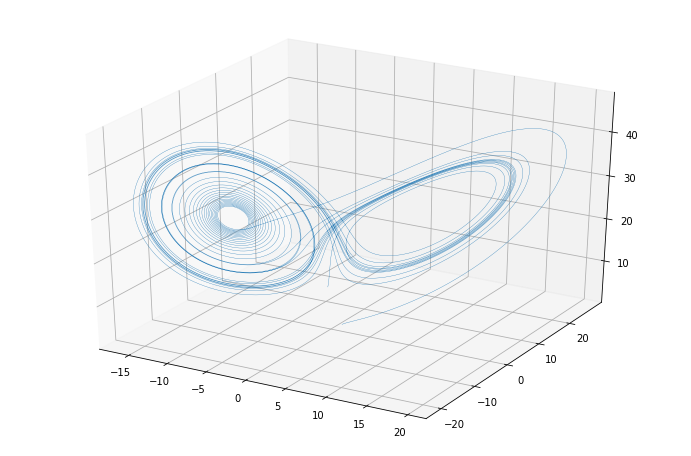

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], linewidth=0.3)
plt.show()

Resulting trajectories can be plotted in 3D: this illustrates the attractor for the system - a butterfly-shaped fractal surface onto which almost all trajectories will eventually converge.

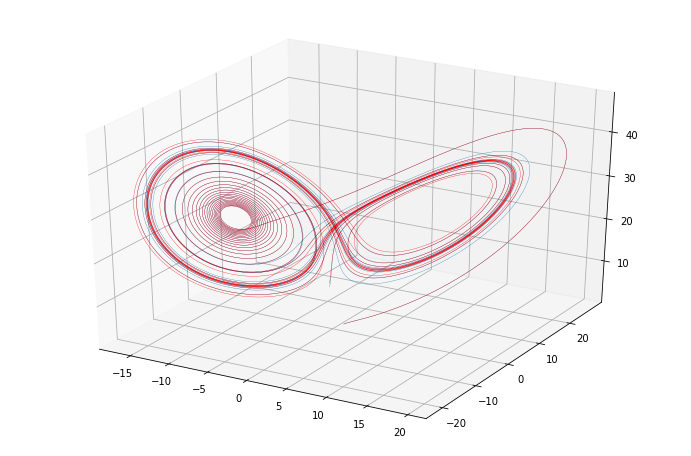

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], linewidth=0.3)
ax.plot(traj2[:, 0], traj2[:, 1], traj2[:, 2], c='r', linewidth=0.3)
plt.show()

Calculating two trajectories with slightly different initial conditions (red vs blue), sensitive dependence on initial conditions can be seen (the trajectories quickly diverge). 

This sensitivity can be quantified by the (first) Lyapunov exponent - which reflects the rate at which nearby points diverge as the system evolves in time. Initially, the logarithm of the separation between initially close points will increase linearly with time, with the gradient defining the Lyapunov exponent. Eventually, the points will reach a maximum separation defined by the size of the attractor. 

In [31]:
def separation(trajectory1, trajectory2):
    delta = trajectory1 - trajectory2
    delta_2 = delta ** 2
    distances = np.sum(delta_2, axis=1) ** 0.5
    return distances

In [32]:
distances = separation(traj, traj2)

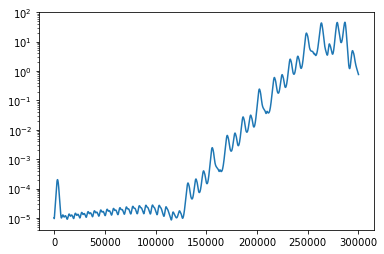

In [33]:
plt.plot(np.arange(len(distances)), distances)
plt.yscale('log')
plt.show()

Plotting the evolution of the system (the log of the distance between points on the two trajectories) over 30 dimensionless time periods (300,000 time steps), this linear relation is seen between approximately steps 120,000 - 260,000. I am not sure why the system does not display the expected behaviour for the first 120,000 steps.

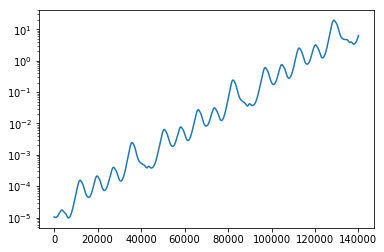

In [43]:
l_distances = distances[120000:260000]

plt.plot(np.arange(len(l_distances)), l_distances)
plt.yscale('log')
plt.show()

In [44]:
gradient, _, _, _, _ = stats.linregress(
    np.arange(len(l_distances)), np.log(l_distances))

exponent = gradient / dt

print(exponent)

0.978105853747


Finding the gradient over this range yields an estimated Lyapunov exponent for the system of around 0.98 - this is within 10% of the true value (0.91 to 2sf).